In [18]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
import pandas as pd
import sys, os

sys.path.append('../utils')
sys.path.append(os.path.realpath('../utils'))



In [19]:
import functions2

In [3]:

ruta = '../data/raw_files/idealista16-2.csv'
df_tot = pd.read_csv(ruta)
df_tot.head()

,Unnamed: 0,propertyCode,thumbnail,externalReference,numPhotos,price,propertyType,operation,size,exterior,...,has360,hasStaging,topNewDevelopment,superTopHighlight,floor,district,neighborhood,hasLift,labels,newDevelopmentFinished
0,0,97141518,https://img3.idealista.com/blur/WEB_LISTING/0/...,3903,47,190000.0,chalet,sale,650.0,False,...,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,1,100307559,https://img3.idealista.com/blur/WEB_LISTING/0/...,736,48,185000.0,chalet,sale,307.0,False,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2,98077115,https://img3.idealista.com/blur/WEB_LISTING/0/...,0045641313,2,118800.0,chalet,sale,307.0,False,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3,100414739,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,27,26990.0,chalet,sale,166.0,False,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100206018,https://img3.idealista.com/blur/WEB_LISTING/0/...,San Eudaldo,11,165000.0,flat,sale,74.0,False,...,False,False,False,False,4,Vicálvaro,Ambroz,True,NaN,NaN


In [4]:
pisos_madrid = df_tot.loc[df_tot.municipality == 'Madrid']

In [5]:
functions2.data_report(df=pisos_madrid)

COL_N,Unnamed: 0,propertyCode,thumbnail,externalReference,numPhotos,price,propertyType,operation,size,exterior,...,has360,hasStaging,topNewDevelopment,superTopHighlight,floor,district,neighborhood,hasLift,labels,newDevelopmentFinished
DATA_TYPE,int64,int64,object,object,int64,float64,object,object,float64,bool,...,bool,bool,bool,bool,object,object,object,object,object,object
MISSINGS (%),0.0,0.0,0.37,25.06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.94,0.0,0.0,5.78,90.44,99.51
UNIQUE_VALUES,50,2392,2381,1727,88,675,5,1,304,2,...,2,2,1,1,23,21,134,2,6,2
CARDIN (%),2.05,98.11,97.66,70.84,3.61,27.69,0.21,0.04,12.47,0.08,...,0.08,0.08,0.04,0.04,0.94,0.86,5.5,0.08,0.25,0.08


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pisos_madrid.drop('price', axis=1),
                                                    pisos_madrid['price'],
                                                    test_size=0.2,
                                                    random_state=42)

In [7]:
# Antes de arrancar, quiero tener una tabla con el costo por metro2 promedio de cada distrito.
valor_m2 = X_train[['district','priceByArea']].groupby('district').mean().sort_values(by='priceByArea')
valor_m2

,priceByArea
district,
Villaverde,1994.619048
Puente de Vallecas,2115.210145
Usera,2277.080000
Carabanchel,2379.171429
Villa de Vallecas,2516.935484
Vicálvaro,2525.000000
Latina,2643.666667
Moratalaz,2678.000000
San Blas,2846.333333


<AxesSubplot: xlabel='priceByArea', ylabel='district'>

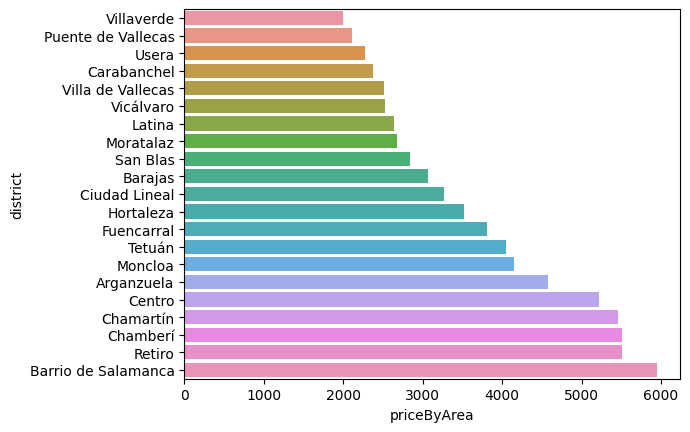

In [10]:
sns.barplot(x=valor_m2.priceByArea, y=valor_m2.index, orient = 'h')

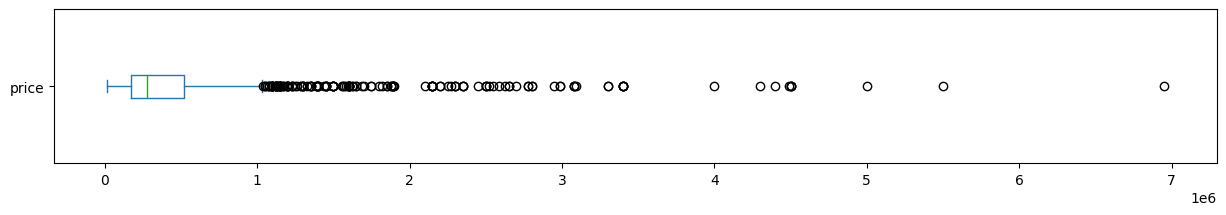

In [11]:
y_train.plot(kind="box", y="price",figsize=(15,2),vert=False); 

In [12]:
len(pisos_madrid.loc[pisos_madrid.price>1000000]) 
# hay 190 outliers. casi un 10% de la muestra.

190

In [13]:
pisos_madrid[['size','district','price']].loc[pisos_madrid.price>6000000] 
# Veo el piso más caro a ver si es error. 
# Es un penthouse de 742 metros en Salamanca con 5 dormitorios.
# Puede ser real. Voy a dejarlo.

,size,district,price
1062,742.0,Barrio de Salamanca,6950000.0


<AxesSubplot: ylabel='propertyType'>

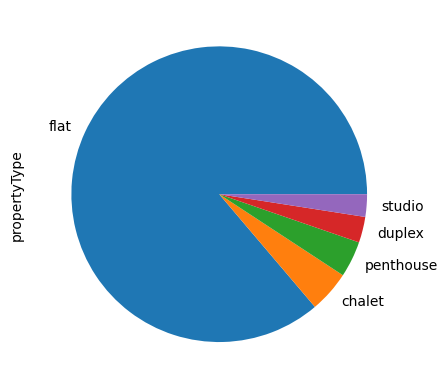

In [14]:
X_train.propertyType.value_counts().plot.pie()

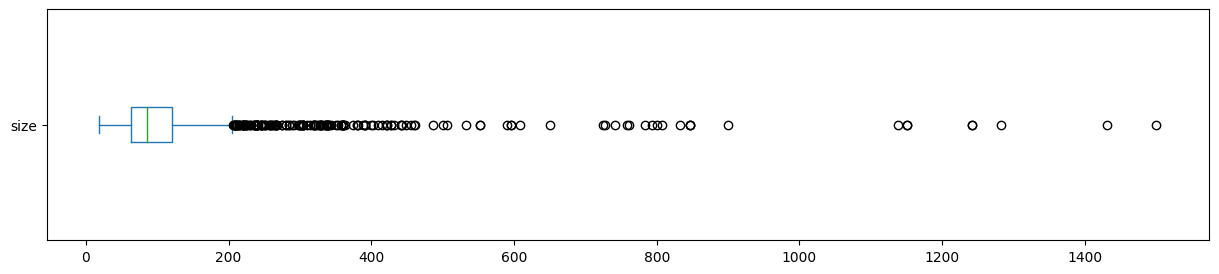

In [24]:
## COLUMNA SIZE
X_train.plot(kind="box", y="size",figsize=(15,3),vert=False);

In [25]:
X_train.loc[X_train['size'] > 1400] # CHALETS DE 9 Y 7 HABITACIONES. PUEDE SER REAL.

,Unnamed: 0,propertyCode,thumbnail,externalReference,numPhotos,propertyType,operation,size,exterior,rooms,...,has360,hasStaging,topNewDevelopment,superTopHighlight,floor,district,neighborhood,hasLift,labels,newDevelopmentFinished
216,16,97002795,https://img3.idealista.com/blur/WEB_LISTING/27...,NaN,6,chalet,sale,1500.0,False,9,...,False,False,False,False,NaN,Moncloa,El Plantío,NaN,"[{'name': 'villaType', 'text': 'Villa'}, {'nam...",NaN
189,39,99369772,https://img3.idealista.com/blur/WEB_LISTING/0/...,CHA0004,47,chalet,sale,1431.0,False,7,...,False,False,False,False,NaN,Moncloa,El Plantío,NaN,"[{'name': 'villaType', 'text': 'Villa'}]",NaN


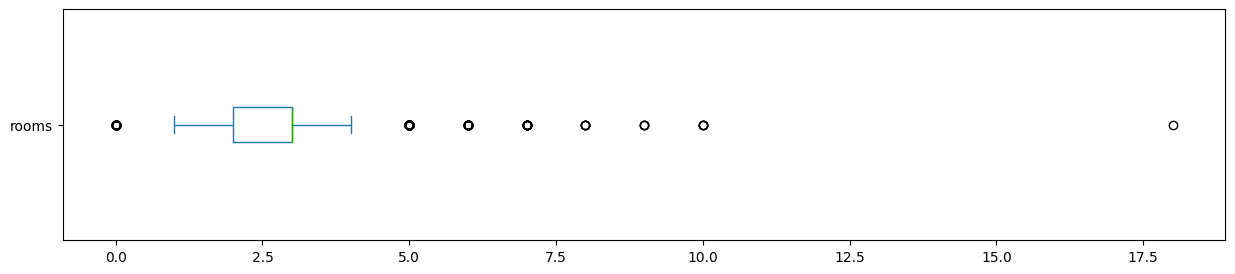

In [17]:
## COLUMNA ROOMS
X_train.plot(kind="box", y="rooms",figsize=(15,3),vert=False); # No hay muchos outliers

In [20]:
X_train.loc[pisos_madrid.rooms==18] 
# El más grande con 18 habitaciones sale cerca de 1.000.000. Real.

,Unnamed: 0,propertyCode,thumbnail,externalReference,numPhotos,propertyType,operation,size,exterior,rooms,...,has360,hasStaging,topNewDevelopment,superTopHighlight,floor,district,neighborhood,hasLift,labels,newDevelopmentFinished
2766,16,99737228,https://img3.idealista.com/blur/WEB_LISTING/0/...,ANGELITA CAMARERO,47,chalet,sale,391.0,False,18,...,False,False,False,False,NaN,Fuencarral,Peñagrande,NaN,NaN,NaN


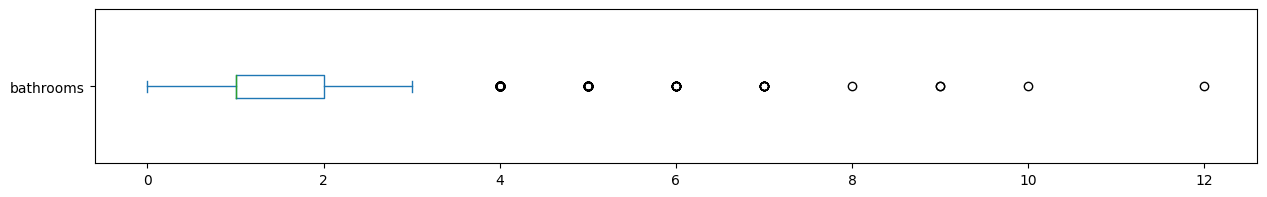

In [23]:
# BATHROOMS
X_train.plot(kind="box", y="bathrooms",figsize=(15,2),vert=False); # No hay tantos outliers


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

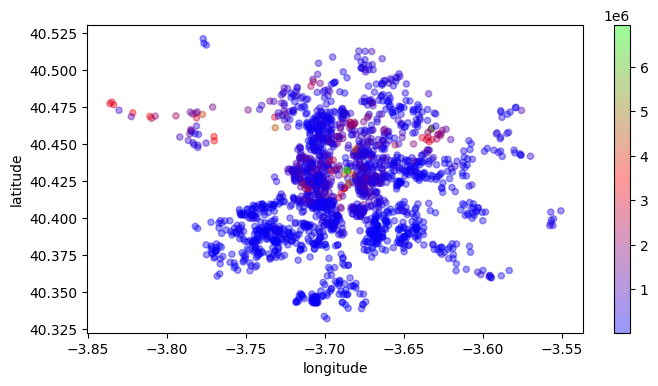

In [27]:
## LATITUD Y LONGITUD
X_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        c=y_train, cmap='brg', colorbar=True, sharex=False, figsize=(8,4)) 

<AxesSubplot: ylabel='status'>

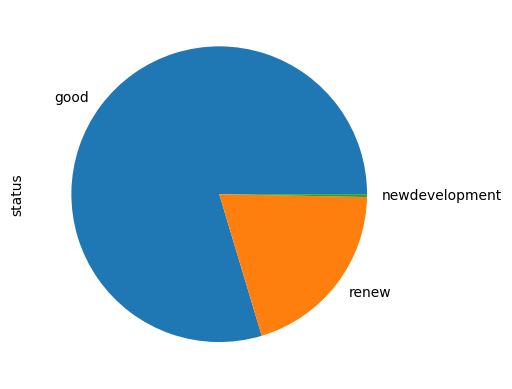

In [28]:
## STATUS
X_train.status.value_counts().plot.pie()

In [29]:
## DETAILEDTYPE
X_train.detailedType.value_counts()

{'typology': 'flat'}                                          1681
{'typology': 'flat', 'subTypology': 'penthouse'}                77
{'typology': 'flat', 'subTypology': 'duplex'}                   55
{'typology': 'flat', 'subTypology': 'studio'}                   48
{'typology': 'chalet', 'subTypology': 'terracedHouse'}          33
{'typology': 'chalet', 'subTypology': 'independantHouse'}       33
{'typology': 'chalet', 'subTypology': 'semidetachedHouse'}      20
{'typology': 'chalet'}                                           3
Name: detailedType, dtype: int64

In [30]:
len(X_train.loc[(X_train.detailedType!="{'typology': 'flat'}")&(X_train.detailedType!="{'typology': 'chalet'}")])/X_train.shape[0]
# Solo me aporta información nueva para un 13% de los casos la feature subtypology.
# Voy a eliminar la columna.

0.13641025641025642

In [31]:
## FLOOR
X_train.floor.value_counts()
# reemplazar 'bj' y 'en' por 0
# reemplazar ss por -1

1     368
2     307
bj    267
3     259
4     204
5     120
6      78
8      37
7      33
en     32
9      12
11      9
ss      8
10      7
17      5
12      5
st      5
-1      3
13      2
16      1
15      1
19      1
Name: floor, dtype: int64

In [32]:
X_train.floor.isna().value_counts()

False    1764
True      186
Name: floor, dtype: int64

In [ ]:

# Si son chalets, voy a rellenarlos el floor con 0. 
# Si son flats, voy a rellenar con la mediana.

<AxesSubplot: xlabel='price', ylabel='district'>

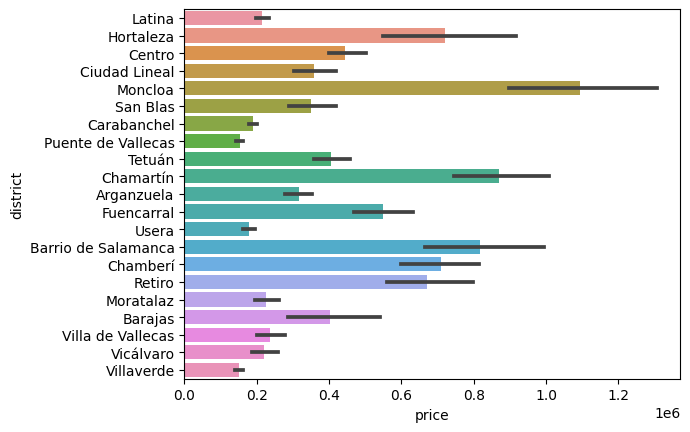

In [33]:
# DISTRICT
sns.barplot(x=y_train, y=X_train.district, orient = 'h')

In [34]:
# HASLIFT
X_train.hasLift.isna().value_counts()

False    1830
True      120
Name: hasLift, dtype: int64

In [35]:
isna = X_train.loc[X_train.hasLift.isna()]
isna.propertyType.value_counts() 
# si chalet = 0 
# flat = 0 -> voy a asumir que no tienen.

chalet    89
flat      31
Name: propertyType, dtype: int64